In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
X = iris.data[:, :2]
y = (iris.target != 0) * 1
X.shape

(150, 2)

In [3]:
mean = np.mean(X, axis = 0)
std = np.std(X, axis = 0, ddof = 1)
print(mean, std)

[5.84333333 3.05733333] [0.82806613 0.43586628]


In [4]:
x = np.array(X)
Y = np.array([y])
normX = (x-mean)/std

In [5]:
eta = 0.01
max_iterations = 1000
m = 150
theta = np.random.randn(3,1)
theta

array([[-0.51942351],
       [-1.24706256],
       [ 0.01545828]])

In [6]:
xNew = np.c_[np.ones((150,1)), normX.T[0], normX.T[1]]


        

In [13]:
for iterations in range(max_iterations):
    gradients = 1/m * xNew.T.dot(Y.T-(1/(1+np.exp(-(xNew.dot(theta))))))
    theta = theta - eta * gradients
theta

array([[ -6.83841876],
       [-14.61123623],
       [ 10.91785171]])

In [8]:
yH = xNew.dot(theta)

def sigmoid(x):
    return 1/(1+np.exp(-x))
yHat = sigmoid(yH)
yHat_cls = []
for i in range(yHat.size):
    if y[i]<0.5:
        yHat_cls.append(0)
    else:
        yHat_cls.append(1)
yHat_cls=np.array([yHat_cls])
yHat_cls[0][145]

1

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


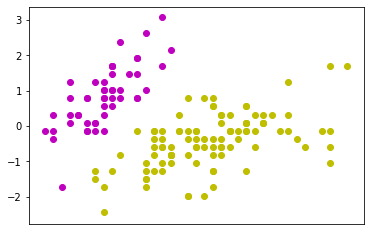

In [9]:
N = np.array(yHat_cls)
print(N)
print(y)

xNew0 = []
xNew1 = []
for i in range(len(y)):
    if y[i] == 0:
        xNew0.append(xNew[i])
    else:
        xNew1.append(xNew[i])
xNew0 = np.array([xNew0])
xNew1 = np.array([xNew1])





plt.scatter(xNew0[0].T[1], xNew0[0].T[2], color = 'm')
plt.scatter(xNew1[0].T[1], xNew1[0].T[2], color = 'y')
# plt.xlim(xNew.T[1], xNew.T[2])
plt.xticks(())
plt.show()


In [10]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression(penalty='none', solver='lbfgs',max_iter=10000)
lgr.fit(xNew,y)
f = lgr.predict(xNew)
f[0]

0

In [11]:
xN0 = []
xN1 = []
for i in range(f.size):
    if f[i] == 0:
        xN0.append(xNew[i])
    else:
        xN1.append(xNew[i])
xN0 = np.array([xN0])
xN1 = np.array([xN1])

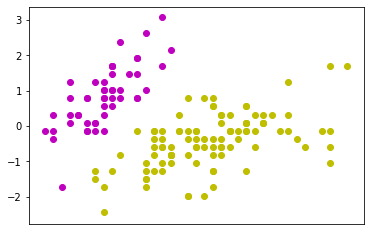

In [12]:
plt.scatter(xN0[0].T[1], xN0[0].T[2], color = 'm')
plt.scatter(xN1[0].T[1], xN1[0].T[2], color = 'y')
# plt.xlim(xNew.T[1], xNew.T[2])
plt.xticks(())
plt.show()